In [1]:
from sklearn.ensemble import GradientBoostingClassifier

import numpy as np
from matplotlib import pyplot as plt

from art.estimators.classification import SklearnClassifier
from art.attacks.evasion import ZooAttack
from art.utils import load_mnist

import warnings
warnings.filterwarnings('ignore')

# 1 Training scikit-learn GradientBoostingClassifier and attacking with ART Zeroth Order Optimization attack

# 1.1 Load and transform MNIST dataset


In [209]:
(x_train, y_train), (x_test, y_test), min_, max_ = load_mnist()

n_samples_train = x_train.shape[0]
n_features_train = x_train.shape[1] * x_train.shape[2] * x_train.shape[3]
n_samples_test = x_test.shape[0]
n_features_test = x_test.shape[1] * x_test.shape[2] * x_test.shape[3]

x_train = x_train.reshape(n_samples_train, n_features_train)
x_test = x_test.reshape(n_samples_test, n_features_test)

y_train = np.argmax(y_train, axis=1)
y_test = np.argmax(y_test, axis=1)

n_samples_max = 200
x_train = x_train[0:n_samples_max]
y_train = y_train[0:n_samples_max]
x_test = x_test[0:n_samples_max]
y_test = y_test[0:n_samples_max]


# 1.2 Train GradientBoostingClassifier classifier


In [210]:
model = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, subsample=1.0, 
                                   criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, 
                                   min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001)
model.fit(X=x_train, y=y_train)

GradientBoostingClassifier()

# 1.3 Create and apply Zeroth Order Optimization Attack with ART


In [204]:
art_classifier = SklearnClassifier(model=model)

In [254]:
zoo = ZooAttack(classifier=art_classifier, confidence=0.0, targeted=False, learning_rate=1e-1, max_iter=100,
                binary_search_steps=20, initial_const=1e-3, abort_early=True, use_resize=False, 
                use_importance=False, nb_parallel=10, batch_size=1, variable_h=0.25)

In [255]:
x_train_adv = zoo.generate(x_train)
#x_train_adv = zoo.generate(x_train, np.full(len(x_train), 2, dtype='int'))


ZOO:   0%|          | 0/200 [00:00<?, ?it/s]

# 1.4 Evaluate GradientBoostingClassifier on benign and adversarial samples


In [224]:
score = model.score(x_train, y_train)
print("Benign Training Score: %.4f" % score)
#score = model.score(x_test, y_test)
#print("Benign Training Score: %.4f" % score)

Benign Training Score: 1.0000


# Checking Attack

In [248]:
# Image instance to check the attack
index_instance = 4

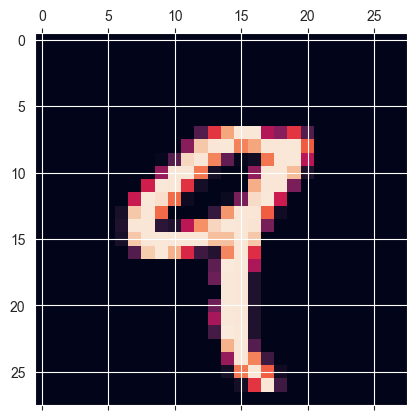

In [249]:
plt.matshow(x_train[index_instance, :].reshape((28, 28)))
plt.clim(0, 1)

In [250]:
prediction = model.predict(x_train[index_instance].reshape(1, -1))
print("Benign Training Predicted Label: %i" % prediction)

Benign Training Predicted Label: 9


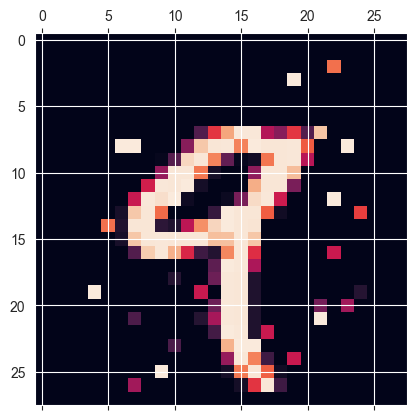

In [251]:
plt.matshow(x_train_adv[index_instance, :].reshape((28, 28)))
plt.clim(0, 1)

In [252]:
prediction = model.predict(x_train_adv[index_instance].reshape(1, -1))
print("Adversarial Training Predicted Label: %i" % prediction)

Adversarial Training Predicted Label: 9


# 1.5 Compare both images side by side

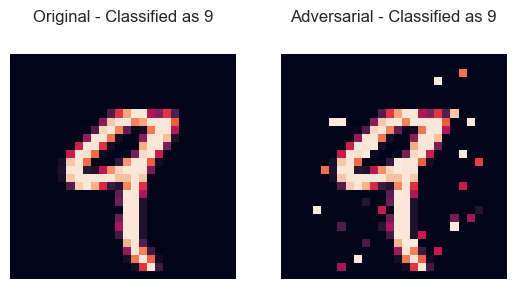

In [253]:
fig, axs = plt.subplots(1, 2)
axs[0].matshow(x_train[index_instance, :].reshape((28, 28)))
axs[0].set_title(f"Original - Classified as {model.predict(x_train[index_instance].reshape(1, -1))[0]}")
axs[0].axis('off')
axs[0].images[0].set_clim(0, 1) 

axs[1].matshow(x_train_adv[index_instance, :].reshape((28, 28)))
axs[1].set_title(f"Adversarial - Classified as {model.predict(x_train_adv[index_instance].reshape(1, -1))[0]}")
axs[1].axis('off')
axs[1].images[0].set_clim(0, 1) 
plt.show()